# PROJECT  : Sasol Customer Retention Recruitment 

## Compiled by: Mashele G.P

## Project overview/Description
The objective of this challenge is to create a machine-learning model that can forecast the probability of each customer becoming inactive and refraining from making any transactions for a period of 90 days.

An effective solution will enable a business to identify customers who may be on the verge of becoming inactive, allowing them to implement strategies in advance to retain these customers.

Sasol is a global chemicals and energy company. We harness our knowledge and expertise to integrate sophisticated technologies and processes into world-scale operating facilities. We safely and sustainably source, produce and market a range of high-quality products in 22 countries, creating value for stakeholders. Our purpose “Innovating for a better world” compels us to deliver on triple bottom line outcomes of People, Planet and Profit, responsibly and always with the intent to be a force for good.

## Problem statement


## Data Description

##The churn dataset includes 19 variables including 15 numeric variables and 04 categorical variables.

* ID       :  Customer Identity number <br>	
* region   :  the location of each client <br>
* tenure   :  duration in the network <br>
* Amount   :   top-up amount <br>
* refill_frequency :	A number of times the customer refilled <br>
* revenue       :	monthly revenue of each client <br>
* arpu_segment  :	revenue over 90 days / 3 months <br>
* frequency     :	number of times the client has made an revenue <br>
* data_volume	  : number of connections <br>
* on_net        : call within network <br>
* Procuct_1     : call to Procuct_1  <br>
* Procuct_2     : call to Procuct_2 <br>
* zone1         : call to zones1 <br> 
* zone2         : call to zones2 <br>
* mrg	          : a client who is going <br>
* regularity    : number of times the client is active for 90 days <br>
* top_pack      : the most active packs <br>
* freq_top_pack : number of times the client has activated the top pack packages <br>
* Target        : variable to predict  <br>

### Import the necessary libraries

In [1]:
!pip install imblearn

In [2]:
!pip install cython

In [3]:
%load_ext cython

In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (mean_absolute_error,f1_score,accuracy_score,recall_score, precision_score,roc_auc_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To be used for data scaling 
from sklearn.preprocessing import StandardScaler
# To be used for categorical feature selection
from sklearn.feature_selection import chi2
# To oversample and undersample data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
from sklearn.ensemble import (RandomForestClassifier,BaggingClassifier,)
import lightgbm as lgb
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Now lets read the train and test  dataset
train_data = pd.read_csv("Customer_retenstion_train.csv.csv")
test_data = pd.read_csv("Customer_retention_test.csv.csv")

In [7]:
# Print the first five rows of the  train dataset
train_data.head()  

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Target
0,ID_YEB05X4KUGPQ,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
1,ID_Z9IQ9QH52KVN,Nebula,K > 24 month,4764.960,41.000,4756.840,1585.470,41.000,2.000,626.000,24.000,NaN,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,31.000,0
2,ID_YZSU7B7M35QS,Celestial,K > 24 month,5769.230,22.000,5769.230,1923.080,22.000,28121.000,0.000,NaN,1.000,NaN,NaN,NO,61,NaN,NaN,0
3,ID_QS4F5LEX29KM,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
4,ID_8IYIC9PFU8U1,Eclipsara,K > 24 month,5341.880,58.000,5636.750,1879.060,60.000,1131.000,546.000,376.000,0.000,NaN,NaN,NO,62,Mixt 250F=Unlimited_call24H,31.000,0


In [8]:
# Print the last five rows of the training dataset
train_data.tail()

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Target
1507829,ID_D1MA2025F1U6,NaN,K > 24 month,7179.490,17.000,6972.220,2323.930,18.000,4269.000,7.000,NaN,11.000,0.000,61.000,NO,41,"Data:490F=1GB,7d",4.000,0
1507830,ID_9H6BGU1FS1CD,Celestial,K > 24 month,854.700,2.000,854.700,285.040,2.000,2276.000,0.000,NaN,NaN,NaN,NaN,NO,36,"Data:1000F=2GB,30d",2.000,0
1507831,ID_QWJPIJ065LA4,Luminous,K > 24 month,1923.080,9.000,2136.750,712.390,10.000,NaN,34.000,74.000,48.000,NaN,NaN,NO,40,All-net 500F=2000F;5d,10.000,0
1507832,ID_B0S6HQUEDWJ7,Astral,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NO,39,NaN,NaN,0
1507833,ID_T7DN0N7KLS2R,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1


In [9]:
## Code to print the dimension of the training dataset
train_data.shape

(1507834, 19)

In [10]:
print(f" The banking  training dataset consist of {train_data.shape[0]} rows and {train_data.shape[1]} columns")

 The banking  training dataset consist of 1507834 rows and 19 columns


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507834 entries, 0 to 1507833
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ID                1507834 non-null  object 
 1   region            913743 non-null   object 
 2   tenure            1507834 non-null  object 
 3   Amount            978320 non-null   float64
 4   refill_frequency  978320 non-null   float64
 5   revenue           999713 non-null   float64
 6   arpu_segment      999713 non-null   float64
 7   frequency         999713 non-null   float64
 8   data_volume       766028 non-null   float64
 9   on_net            957192 non-null   float64
 10  Procuct_1         881271 non-null   float64
 11  Procuct_2         604784 non-null   float64
 12  zone1             118986 non-null   float64
 13  zone2             95505 non-null    float64
 14  mrg               1507834 non-null  object 
 15  regularity        1507834 non-null  int64  
 16  

### Observation
* The customer retention training dataset consist of 1507834 rows and  19 columns. <br>
* 12 of the columns are floating data type, 2 are integers and 5 are objects data types.<br>
*  Some of the columns consist of missing values. <br>
* The data memory usage is 218.6 MB(Megabytes)

In [12]:
## Code to print the first five rows of the testing dataset
test_data.head()

,ID,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack
0,ID_LZ8K373W7EWV,Droidika,K > 24 month,2008.550,16.000,2010.260,670.090,17.000,10.000,247.000,17.000,70.000,NaN,NaN,NO,59,On net 200F=Unlimited _call24H,11.000
1,ID_04KNWHGV5783,Luminous,K > 24 month,2991.450,14.000,2991.450,997.010,17.000,NaN,99.000,100.000,84.000,NaN,NaN,NO,49,All-net 500F=2000F;5d,12.000
2,ID_CXS07G6VLB2U,Astral,K > 24 month,1581.200,8.000,1578.210,526.070,8.000,436.000,47.000,113.000,5.000,NaN,NaN,NO,13,Jokko_Daily,6.000
3,ID_N3NFJJVHS25K,Eclipsara,K > 24 month,2564.100,12.000,2777.780,926.070,13.000,0.000,135.000,181.000,NaN,NaN,NaN,NO,53,All-net 500F=2000F;5d,13.000
4,ID_R36J4ROT93E9,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN


In [13]:
### Code to print the dimension of the testing dataset
test_data.shape

(380127, 18)

### Observation
* The testing dataset consist of 380127 rows and 18 columns.

In [14]:
# Code to display the dataset data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                380127 non-null  object 
 1   region            230399 non-null  object 
 2   tenure            380127 non-null  object 
 3   Amount            247072 non-null  float64
 4   refill_frequency  247072 non-null  float64
 5   revenue           252754 non-null  float64
 6   arpu_segment      252754 non-null  float64
 7   frequency         252754 non-null  float64
 8   data_volume       193087 non-null  float64
 9   on_net            241613 non-null  float64
 10  Procuct_1         222897 non-null  float64
 11  Procuct_2         153126 non-null  float64
 12  zone1             29861 non-null   float64
 13  zone2             24076 non-null   float64
 14  mrg               380127 non-null  object 
 15  regularity        380127 non-null  int64  
 16  top_pack          22

### Observation:
* The financial sector training dataset consist of 23524 rows and 13 columns. <br>
* 3 of those columns are integer data types. <br>
* 10(ten) are object data types. <br>
*  memory usage is 2.3 MB(Megabytes).

In [15]:
### Code to make a copy of the original training dataset
data = train_data.copy()

In [16]:
## Drop the ID column in the training dataset
data=data.drop(columns="ID",axis=1)

In [17]:
 # Code to print the statistical summary of the numerical columns in the training dataset
data.describe().T  

,count,mean,std,min,25%,50%,75%,max
Amount,978320.000,2361.213,3028.955,4.270,427.350,1282.050,3141.030,124145.300
refill_frequency,978320.000,11.521,13.267,1.000,2.000,7.000,16.000,133.000
revenue,999713.000,2352.073,3053.177,0.430,427.350,1282.050,3146.580,113696.580
arpu_segment,999713.000,784.027,1017.724,0.000,142.310,427.350,1048.720,37898.720
frequency,999713.000,13.968,14.682,1.000,3.000,9.000,20.000,91.000
data_volume,766028.000,3354.667,13304.604,0.000,0.000,256.000,2879.000,1823866.000
on_net,957192.000,278.001,874.412,0.000,5.000,27.000,156.000,50809.000
Procuct_1,881271.000,95.325,203.328,0.000,7.000,29.000,99.000,12040.000
Procuct_2,604784.000,23.146,63.507,0.000,2.000,6.000,20.000,4174.000
zone1,118986.000,8.092,40.739,0.000,0.000,1.000,3.000,4792.000


### Observation:
* The numerical dataset columns are skewed to the right with mean greater than the median.
* 75% of the customers have revenue of  is R 3146.580  and above.

In [18]:
# Code to check for missing values in the training dataset
data.isnull().sum()

region               594091
tenure                    0
Amount               529514
refill_frequency     529514
revenue              508121
arpu_segment         508121
frequency            508121
data_volume          741806
on_net               550642
Procuct_1            626563
Procuct_2            903050
zone1               1388848
zone2               1412329
mrg                       0
regularity                0
top_pack             631823
freq_top_pack        631823
Target                    0
dtype: int64

In [19]:
data.isnull().sum().sum()

10064366

###  Observation:
* There are 10064366 missing values in the training dataset.
* 86% of the numerical data columns contain misssing values.
* Data preprocessing will be done to handle missing values.

In [20]:
data.shape[0]

1507834

In [21]:
### Now compute the  percentage of missing values in each column
round((data.isnull().sum()/ data.shape[0])*100,)

region             39.000
tenure              0.000
Amount             35.000
refill_frequency   35.000
revenue            34.000
arpu_segment       34.000
frequency          34.000
data_volume        49.000
on_net             37.000
Procuct_1          42.000
Procuct_2          60.000
zone1              92.000
zone2              94.000
mrg                 0.000
regularity          0.000
top_pack           42.000
freq_top_pack      42.000
Target              0.000
dtype: float64

### Observation
* Procuct-2 ,Zone 1 and Zone 2 are columns with missing values greater than 50%.
* We need to drop these three columns

In [22]:
# Code to check for duplicates in the dataset
data.duplicated().sum()

445107

### Observation 
* There are 445107 duplicates present in the training dataset

In [23]:
### Code to drop the duplicates and recheck in the duplicates are still present
data=data.drop_duplicates()

In [24]:
data.duplicated().sum()

0

### Provide the tenure columns with codes
* 3-6 months  : 1
* 6-9 months  : 2
* 9-12 months : 3
* 12-15 months: 4
* 15-18 months: 5
* 18-21 months: 6
* 21-24 months: 7
* above 24 months : 8

In [25]:
## Code to replace the categorical tenure columns with numbers in the training dataset
data["tenure"] = data["tenure"].replace('D 3-6 month',1)
data["tenure"] = data["tenure"].replace('E 6-9 month',2)
data["tenure"] = data["tenure"].replace('F 9-12 month',3)
data["tenure"] = data["tenure"].replace('G 12-15 month',4)
data["tenure"] = data["tenure"].replace('H 15-18 month',5)
data["tenure"] = data["tenure"].replace('I 18-21 month',6)
data["tenure"] = data["tenure"].replace('J 21-24 month',7)
data["tenure"] = data["tenure"].replace('K > 24 month',8)

In [26]:
## Code to replace the categorical tenure columns with numbers in the testing dataset
test_data["tenure"] = test_data["tenure"].replace('D 3-6 month',1)
test_data["tenure"] = test_data["tenure"].replace('E 6-9 month',2)
test_data["tenure"] = test_data["tenure"].replace('F 9-12 month',3)
test_data["tenure"] = test_data["tenure"].replace('G 12-15 month',4)
test_data["tenure"] = test_data["tenure"].replace('H 15-18 month',5)
test_data["tenure"] = test_data["tenure"].replace('I 18-21 month',6)
test_data["tenure"] = test_data["tenure"].replace('J 21-24 month',7)
test_data["tenure"] = test_data["tenure"].replace('K > 24 month',8)

In [27]:
data.head(10)

,region,tenure,Amount,refill_frequency,revenue,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,zone1,zone2,mrg,regularity,top_pack,freq_top_pack,Target
0,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
1,Nebula,8,4764.960,41.000,4756.840,1585.470,41.000,2.000,626.000,24.000,NaN,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,31.000,0
2,Celestial,8,5769.230,22.000,5769.230,1923.080,22.000,28121.000,0.000,NaN,1.000,NaN,NaN,NO,61,NaN,NaN,0
3,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
4,Eclipsara,8,5341.880,58.000,5636.750,1879.060,60.000,1131.000,546.000,376.000,0.000,NaN,NaN,NO,62,Mixt 250F=Unlimited_call24H,31.000,0
5,Celestial,8,42.740,1.000,42.740,14.100,2.000,4.000,3.000,NaN,NaN,NaN,NaN,NO,44,NaN,NaN,0
6,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,7,NaN,NaN,0
7,Eclipsara,8,2564.100,12.000,2777.780,926.070,13.000,NaN,96.000,96.000,1.000,NaN,NaN,NO,59,All-net 500F =2000F_AllNet_Unlimited,13.000,0
8,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
9,Mandalore,8,1987.180,13.000,2242.740,747.440,13.000,NaN,9.000,39.000,73.000,NaN,NaN,NO,34,All-net 500F=2000F;5d,8.000,0


# Exploratory data analysis(EDA)

## Univariate data analysis

### Numerical data

In [28]:
# Code to select the numerical columns from the training dataset
numerical_columns =data.select_dtypes("number").columns

In [29]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))                    # increase the size of the plot
    plt.title(f"Histogram for {item}")           # Give the graph a title
    plt.xlabel(item)                            # set the label on the x-axis
    plt.ylabel("frequency")                     # set the label on the y-axis
    sns.histplot(data=data,x=item,kde=False);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))                     # increase the size of the plot
    plt.title(f"Boxplot for {item}")               # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);   # Boxplot for numerical dataset
    plt.xlabel(item)                               # set the label on the x-axis
    plt.show()

In [30]:
### Create a list of numerical columns excluding the target and tenure columns 
numerical_columns1 = ['Amount', 'refill_frequency', 'revenue', 'arpu_segment','frequency', 
                      'data_volume', 'on_net', 'Procuct_1', 'Procuct_2', 'zone1',
                     'zone2', 'regularity', 'freq_top_pack']

In [ ]:
# Code to call the function to display the histogram and boxplots for numerical columns
for item in data[numerical_columns1]:
    box_histplot(data,item)

### Observation
* About 93% of the predictor/independent variables are skewed to the right/positively skewed with oultiers on the right side of the whiskers.<br>
* The regularity column is skewed to left with no outliers. <br>
* Data preprocessing will be done to remove outliers in the numerical dataset.



In [ ]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = data['Target'].value_counts() /data.shape[0]
plt.pie(values,labels=["Active","Inactive"],autopct="%1.1f%%",shadow=True)
plt.title("Percentage of the target")
plt.show()

In [ ]:
data["Target"].value_counts()

#### Observation:
* About 94% of the customers are active and making transactions for a period of 90 days
* Only 6% of the customers shows a sign of inactive and refrining from making any transactions.
* The target columns consist of imbalanced dataset
* Balancing of dataset will be done to avoid the model to become baised towards the one class.

In [ ]:
# Create a pie chart to show the percentage for tenure
plt.figure(figsize=(4,5))
values = data["tenure"].value_counts() /data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of tenure by group")
plt.show()

In [ ]:
round(train_data["tenure"].value_counts(normalize=True,ascending=False)*100,)

In [ ]:
### Observation

## Categorical data analysis:

In [ ]:
# Code to select categorical columns
categorical_data = data.select_dtypes("object").columns  

In [ ]:
categorical_data

In [ ]:
## Create a function to display the bar graphs for categorical data columns
def count_plot(data,item):
    plt.figure(figsize=(5,4))            # increase the size of the plot
    sns.countplot(data=data , x=item);   # countplot for categorical columns
    plt.title(f"Countplot for {item}")   # add the title on the countplot
    plt.ylabel("frequency")              # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

In [ ]:
# Print the countplot for customers by region
count_plot(data,"region")

In [ ]:
data["region"].value_counts(ascending=False)

In [ ]:
data["region"].value_counts(normalize=True).plot(kind="bar",xlabel="region", ylabel="%",
                                                 title="Bar graph for percentage of customer by region");

### Observation
* Mandalore , Droidika,Eclipsara,Celestial and Stellaris are the region with the highest number of customers.
* About 594091 of the customers are not indicated as to which region they fall.

In [ ]:
data["mrg"].value_counts()

### Observation
* 
*  

## Bivariate data analysis:

#### Categorical and Numerical data analysis

In [ ]:
## Create a function to display boxplots for numerical and categorical dataset
def box_plot(data,item_1,categorical_item):
    plt.figure(figsize=(15,7))                       # Increase the size of the plot
    sns.boxplot(data=data,x = item_1, y = categorical_item, palette = "Paired_r") 
    plt.title(f"The boxplot for {item_1} relative to {categorical_item}")
    plt.xlabel(item_1)
    plt.ylabel(categorical_item)
    plt.show()

In [ ]:
# Boxplot for revenue relative to region 
box_plot(data,"revenue","region")

### Observation:


In [ ]:
# Boxplot for refill frequency by region
box_plot(data,"refill_frequency","region")

### Observation:
The monthly income data relative to gender is skewed to the right with outliers on the right side of the whisker. <br>
However the average monthly income for females is higher than those of the males.<br>
75% of the females employees earn a monthly income of roughly 8750 dollar and above, which is higher than that of males.<br>
These means that females employees in the organisation earns more than males

In [ ]:
# Boxplot for Amount by region
box_plot(data,"Amount","region")

In [ ]:
# Boxplot for frequency by region
box_plot(data,"frequency","region")

In [ ]:
# Boxplot for data volumne by region
box_plot(data,"data_volume","region")

In [ ]:
# Boxplot for Age relative to country.
box_plot(data,"on_net","region")

In [ ]:
numerical_columns

In [ ]:
# Boxplot for Age relative to relationship.
box_plot(data,'Procuct_1',"region")

In [ ]:
# Boxplot for Age relative to cellphone access.
box_plot(data,'Procuct_2',"region")

In [ ]:
# Boxplot for Age relative to Education level.
box_plot(data,"regularity","region")

In [ ]:
# Boxplot for size relative to bank account.
box_plot(data,"freq_top_pack","region")

In [ ]:
# Code to print the boxplot for numerical columns relative to categorical data
for variable in numerical_columns:
    box_plot(data,variable,categorical_data[0])

### Categorical data analysis only

In [ ]:
## Create a function to display a countplot for bivariate categorical columns relatives to churn data
def bivariate_plot(data,item_1,item_2,color):
    plt.figure(figsize=(10,7))
    sns.countplot(x=item_1,data=data,palette=color,hue=item_2)
    plt.ylabel("frequency")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
bivariate_plot(data,"region","Target",color='CMRmap')

In [ ]:
data.groupby("Target")["region"].value_counts(normalize=True,ascending=False).plot(kind="bar");

### Numerical data

In [ ]:
## Construct a correlation matrix
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Observation:
* Most  of the independent variables are correlated to each other, except for few variables. <br>
* The revenue and arpu-segment exhibit a perfectly strong positive correlation. <br>
* The revenue is determined by using the arpu-segment amount multiplied by the number of months and this is the result of a high correlation between the two independent variables. <br>
* There is also a  very strong positive correlation between frequency and refill_frequency. <br>
* The amount,refill-freqency,revenue,arpu-segment,frequency,product-1 and regularity shows a positive correlation with the freq-top-pack column. <br>
* The amount column shows a very high correlation with the revenue,arpu-segment,refill-frequency and frequency. <br>
* Majority of the independent variables shows a very weak negative correlation with the target variable. <br>
* Due to high correlation between the independent variables, this is a sign of multicollinearity issue. <br>
* Multicollinearity provide the model with misleading coefficients and need to be corrected using feature selection techniques. <br>

In [31]:
### Select columns that are highly correlated
def correlation(data,cut_off):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> cut_off:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [32]:
### Now lets display the highly correlated columns
feature = correlation(data,0.7)
print(feature)

{'arpu_segment', 'revenue', 'freq_top_pack', 'refill_frequency', 'frequency'}


In [ ]:
### Compute the correlation between the target and target min
round(data["Target"].corr(data["revenue"]),3)

In [ ]:
### Compute the correlation between the target and the arpu_segment
round(data["Target"].corr(data["arpu_segment"]),3)

In [ ]:
### Compute the correlation between the target and the frequency
round(data["Target"].corr(data["frequency"]),3)

In [ ]:
### Compute the correlation between the target and the refill-frequency
round(data["Target"].corr(data["refill_frequency"]),3)

In [ ]:
## Compute the correlation between the target and the refill-frequency
round(data["Target"].corr(data['freq_top_pack']),3)

In [33]:
### Now drop one of the columns that are highly correlated. 
### Here we will drop the  frequency and revenue columns
data = data.drop(columns=['refill_frequency','revenue','freq_top_pack'],axis=1)

In [34]:
### Lets drop the column in the testing dataset
test_data = test_data.drop(columns=['refill_frequency','revenue','freq_top_pack'],axis=1)

In [35]:
data.shape

(1062727, 15)

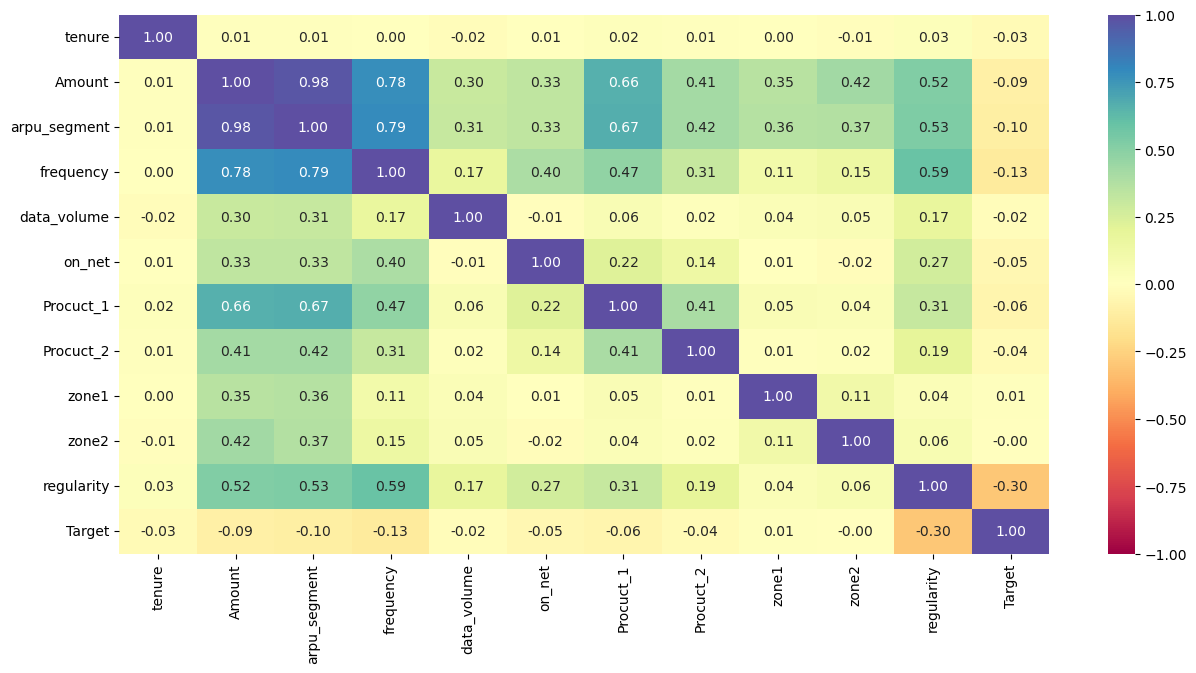

In [36]:
## Now construct a correlation matrix to recheck for highly correlated columns
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
## Compute the correlation between the target and the refill-frequency
round(data["Target"].corr(data["Amount"]),3)

In [ ]:
### Observation
### Now lets display the highly correlated columns
feature1 = correlation(data,0.7)
print(feature1)

In [36]:
### Drop the arpu_segment columns
data = data.drop(columns=['Amount'],axis=1)

## Data preprocessing

### Feature engineering

### Dealing with missing Values

In [ ]:
## We need to drop columns with missing values greater than 50% in training dataset

In [37]:
## Code to print the columns with missing values greater than 50%
col_feature=[] # create an empty list
for item in data.columns:
    if ((data[item].isnull().sum()/data.shape[0])>0.50):
        col_feature.append(item)  # append the columns with missing values greater than 50% in the list
print(col_feature) 

['zone1', 'zone2']


In [38]:
## Now lets drop those columns with missing values above 50% in training dataset
data = data.drop(columns=col_feature,axis=1)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062727 entries, 0 to 1507831
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   region        818748 non-null   object 
 1   tenure        1062727 non-null  int64  
 2   arpu_segment  988315 non-null   float64
 3   frequency     988315 non-null   float64
 4   data_volume   717101 non-null   float64
 5   on_net        926196 non-null   float64
 6   Procuct_1     879299 non-null   float64
 7   Procuct_2     604572 non-null   float64
 8   mrg           1062727 non-null  object 
 9   regularity    1062727 non-null  int64  
 10  top_pack      875042 non-null   object 
 11  Target        1062727 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 105.4+ MB


In [40]:
## Now drop the columns in the testing dataset
test_data = test_data.drop(columns=col_feature,axis=1)

In [41]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            380127 non-null  object 
 1   region        230399 non-null  object 
 2   tenure        380127 non-null  int64  
 3   Amount        247072 non-null  float64
 4   arpu_segment  252754 non-null  float64
 5   frequency     252754 non-null  float64
 6   data_volume   193087 non-null  float64
 7   on_net        241613 non-null  float64
 8   Procuct_1     222897 non-null  float64
 9   Procuct_2     153126 non-null  float64
 10  mrg           380127 non-null  object 
 11  regularity    380127 non-null  int64  
 12  top_pack      221348 non-null  object 
dtypes: float64(7), int64(2), object(4)
memory usage: 37.7+ MB


In [42]:
round((test_data.isnull().sum()/ test_data.shape[0])*100,)

ID              0.000
region         39.000
tenure          0.000
Amount         35.000
arpu_segment   34.000
frequency      34.000
data_volume    49.000
on_net         36.000
Procuct_1      41.000
Procuct_2      60.000
mrg             0.000
regularity      0.000
top_pack       42.000
dtype: float64

In [43]:
### Now impute the numerical missing value columns
## We will impute the median as its not affected by extreme values/outliers

In [44]:
### code to select the numerical columns in the training dataset
train_cols = data.select_dtypes("number").columns

In [45]:
train_cols

Index(['tenure', 'arpu_segment', 'frequency', 'data_volume', 'on_net',
       'Procuct_1', 'Procuct_2', 'regularity', 'Target'],
      dtype='object')

In [46]:
# To impute missing values
from sklearn.impute import SimpleImputer

In [47]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
data[train_cols] = median_imputer.fit_transform(data[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{display}")

The running time:4.668385982513428


In [48]:
data[train_cols].isnull().sum().sum()

0

In [49]:
### Imputation for categorical columns in the training dataset
## Select categorical columns and perform imputation
categorical_train_cols=data.select_dtypes("object").columns

In [50]:
data["Target"].unique()

array([0., 1.])

In [51]:
categorical_train_cols

Index(['region', 'mrg', 'top_pack'], dtype='object')

In [52]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
data[categorical_train_cols] = mode_imputer.fit_transform(data[categorical_train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{display}")

The running time:1.3812777996063232


In [53]:
data[categorical_train_cols].isnull().sum().sum()

0

#### Now do the same for the testing dataset

In [54]:
### Code to select the numerical columns in the testing dataset
test_cols = test_data.select_dtypes("number").columns

In [55]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
test_data[test_cols] = median_imputer.fit_transform(test_data[test_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{display}")

The running time:1.0958945751190186


In [56]:
### Now check for the present of missing values
test_data[test_cols].isnull().sum().sum()

0

In [57]:
### Imputation for categorical columns
## Select categorical columns in the testing dataset and perform imputation
categorical_test_cols=test_data.select_dtypes("object").columns

In [58]:
categorical_test_cols

Index(['ID', 'region', 'mrg', 'top_pack'], dtype='object')

In [59]:
## Instantiate the simple imputer 
mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
test_data[categorical_test_cols] = mode_imputer.fit_transform(test_data[categorical_test_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{display}")

The running time:0.9523935317993164


In [60]:
test_data[categorical_test_cols].isnull().sum().sum()

0

In [61]:
test_data.head()

,ID,region,tenure,Amount,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,mrg,regularity,top_pack
0,ID_LZ8K373W7EWV,Droidika,8.000,2008.550,670.090,17.000,10.000,247.000,17.000,70.000,NO,59.000,On net 200F=Unlimited _call24H
1,ID_04KNWHGV5783,Luminous,8.000,2991.450,997.010,17.000,259.000,99.000,100.000,84.000,NO,49.000,All-net 500F=2000F;5d
2,ID_CXS07G6VLB2U,Astral,8.000,1581.200,526.070,8.000,436.000,47.000,113.000,5.000,NO,13.000,Jokko_Daily
3,ID_N3NFJJVHS25K,Eclipsara,8.000,2564.100,926.070,13.000,0.000,135.000,181.000,6.000,NO,53.000,All-net 500F=2000F;5d
4,ID_R36J4ROT93E9,Mandalore,8.000,1282.050,427.350,9.000,259.000,27.000,29.000,6.000,NO,1.000,All-net 500F=2000F;5d


#### OUTLIER DETECTION AND TREATMENT

In [62]:
numerical_columns1= data.select_dtypes("number").columns

In [63]:
numerical_columns1

Index(['tenure', 'arpu_segment', 'frequency', 'data_volume', 'on_net',
       'Procuct_1', 'Procuct_2', 'regularity', 'Target'],
      dtype='object')

In [64]:
num_col = ['tenure', 'frequency', 'data_volume', 'on_net',
       'Procuct_1', 'Procuct_2', 'regularity']
    

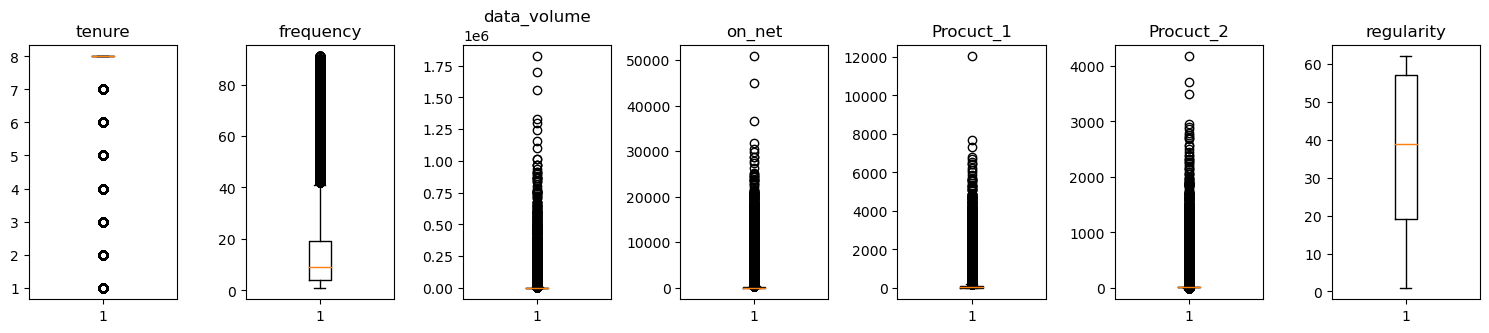

In [65]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(num_col):
    plt.subplot(4,7, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Treatment of Outliers
* 85%  of the numerical columns have outliers on the upper fence of the whiskers
* We need to trim the data above the upper fence of the box and whisker diagram.

In [66]:
### Create a function to identify outliers
def outliers(df,item):
    Q1 = df[item].quantile(0.25)
    Q3 = df[item].quantile(0.75)
    IQR = Q3-Q1
    Lower_fence = Q1-1.5*IQR
    Upper_fence = Q3+1.5*IQR
    outlier_list = df.index[(df[item]<Lower_fence)|(df[item]>Upper_fence)]
    return outlier_list

In [67]:
train_cols1=['tenure', 'frequency', 'data_volume', 'on_net',
       'Procuct_1', 'Procuct_2', 'regularity']

In [68]:
### Now create an list to store the outliers
index_list = []   # create an empty list
for feature in train_cols1:
    ls=outliers(data,feature)
    index_list.extend(ls)

In [69]:
### Now define a function to remove the outliers
def remove(df,outlier_list):
    outlier_list = sorted(set(outlier_list))
    df = df.drop(outlier_list)
    return df

In [70]:
## Code to produce the clean data in the training set
data_clean = remove(data,index_list)

In [71]:
### Now reset the index of the dataset
data_clean.head()

,region,tenure,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,mrg,regularity,top_pack,Target
0,Mandalore,8.000,428.630,9.000,386.000,30.000,29.000,6.000,NO,3.000,All-net 500F=2000F;5d,0.000
3,Mandalore,8.000,428.630,9.000,386.000,30.000,29.000,6.000,NO,6.000,All-net 500F=2000F;5d,0.000
5,Celestial,8.000,14.100,2.000,4.000,3.000,29.000,6.000,NO,44.000,All-net 500F=2000F;5d,0.000
6,Mandalore,8.000,428.630,9.000,386.000,30.000,29.000,6.000,NO,7.000,All-net 500F=2000F;5d,0.000
7,Eclipsara,8.000,926.070,13.000,386.000,96.000,96.000,1.000,NO,59.000,All-net 500F =2000F_AllNet_Unlimited,0.000


In [72]:
### sort the index of the cleaned dataset
data_clean = data_clean.sort_index()

In [73]:
data_clean.shape

(539068, 12)

In [74]:
data_clean["Target"].unique()

array([0., 1.])

In [75]:
data_clean["Target"] = data_clean["Target"].astype(int)

In [76]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539068 entries, 0 to 1507830
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        539068 non-null  object 
 1   tenure        539068 non-null  float64
 2   arpu_segment  539068 non-null  float64
 3   frequency     539068 non-null  float64
 4   data_volume   539068 non-null  float64
 5   on_net        539068 non-null  float64
 6   Procuct_1     539068 non-null  float64
 7   Procuct_2     539068 non-null  float64
 8   mrg           539068 non-null  object 
 9   regularity    539068 non-null  float64
 10  top_pack      539068 non-null  object 
 11  Target        539068 non-null  int32  
dtypes: float64(8), int32(1), object(3)
memory usage: 51.4+ MB


In [77]:
data_clean.head()

,region,tenure,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,mrg,regularity,top_pack,Target
0,Mandalore,8.000,428.630,9.000,386.000,30.000,29.000,6.000,NO,3.000,All-net 500F=2000F;5d,0
3,Mandalore,8.000,428.630,9.000,386.000,30.000,29.000,6.000,NO,6.000,All-net 500F=2000F;5d,0
5,Celestial,8.000,14.100,2.000,4.000,3.000,29.000,6.000,NO,44.000,All-net 500F=2000F;5d,0
6,Mandalore,8.000,428.630,9.000,386.000,30.000,29.000,6.000,NO,7.000,All-net 500F=2000F;5d,0
7,Eclipsara,8.000,926.070,13.000,386.000,96.000,96.000,1.000,NO,59.000,All-net 500F =2000F_AllNet_Unlimited,0


In [78]:
data_clean["Target"].unique()

array([0, 1])

In [79]:
### Now display the boxplot to check for if outliers are still present

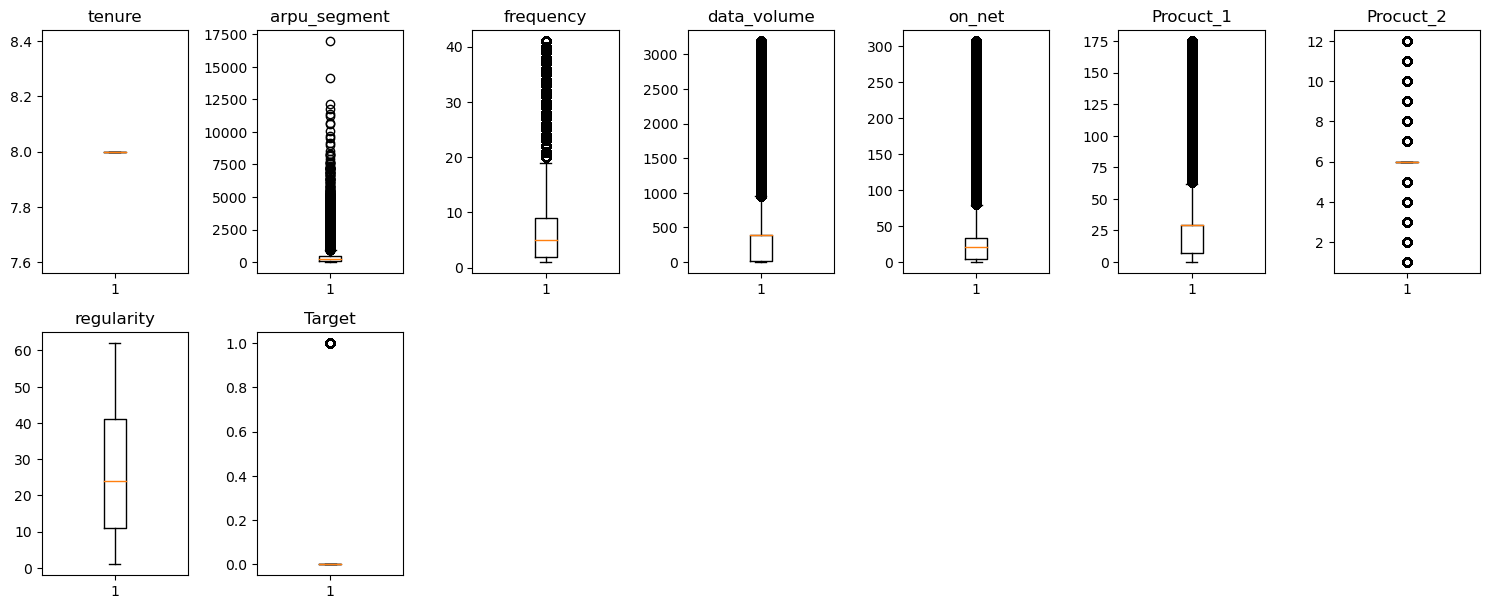

In [80]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(train_cols):
    plt.subplot(4,7, i + 1)
    plt.boxplot(data_clean[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

### Data Preparation:

#### Convert categorical  to numerical variables

In [81]:
data1 = data_clean.copy()

In [82]:
## Select categorical columns in the train dataset
categorical_columns_train = data1.select_dtypes("object").columns 

In [83]:
# first create dummy variables for categorical data by dropping one of the columns in the training data
for variable in categorical_columns_train:
    
       data1[variable] = pd.factorize(data1[variable])[0]  

In [84]:
data1[categorical_columns_train].head()

,region,mrg,top_pack
0,0,0,0
3,0,0,0
5,1,0,0
6,0,0,0
7,2,0,1


In [85]:
data1.isnull().sum().sum()

0

In [86]:
data1["Target"].value_counts()

0    492146
1     46922
Name: Target, dtype: int64

In [87]:
categorical_data =  data1[categorical_columns_train]

In [88]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539068 entries, 0 to 1507830
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   region    539068 non-null  int64
 1   mrg       539068 non-null  int64
 2   top_pack  539068 non-null  int64
dtypes: int64(3)
memory usage: 16.5 MB


In [89]:
X_cat_data = categorical_data

In [90]:
X_cat_data.head()

,region,mrg,top_pack
0,0,0,0
3,0,0,0
5,1,0,0
6,0,0,0
7,2,0,1


In [91]:
y_data = data1["Target"]

In [92]:
y_data.unique()

array([0, 1])

In [93]:
chi_score= chi2(X_cat_data,y_data)

In [94]:
chi_score

(array([81493.87112692,            nan, 13172.1675224 ]),
 array([ 0., nan,  0.]))

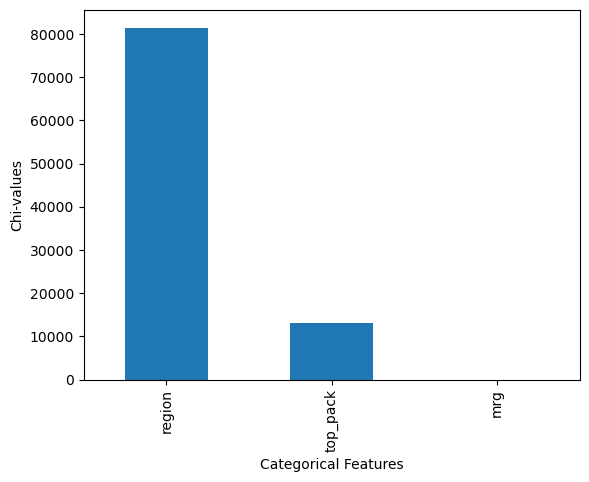

In [95]:
chi_values = pd.Series(chi_score[0],index=X_cat_data.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot(kind="bar",xlabel="Categorical Features",ylabel="Chi-values");

### Observation
* The region and top_pack are  the importance categorical features for the  target variable. <br>
* The higher the score the higher the importance of the feature to the target variable. <br>
* Therefore we can drop the mrg columns from both the training and testing dataset

In [96]:
### Drop the mrg column from both the training and testing dataset
data1 = data1.drop(columns=["mrg"], axis=1)
test_data =test_data.drop(columns=["mrg"], axis=1)

In [97]:
data1.head()

,region,tenure,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,regularity,top_pack,Target
0,0,8.000,428.630,9.000,386.000,30.000,29.000,6.000,3.000,0,0
3,0,8.000,428.630,9.000,386.000,30.000,29.000,6.000,6.000,0,0
5,1,8.000,14.100,2.000,4.000,3.000,29.000,6.000,44.000,0,0
6,0,8.000,428.630,9.000,386.000,30.000,29.000,6.000,7.000,0,0
7,2,8.000,926.070,13.000,386.000,96.000,96.000,1.000,59.000,1,0


In [98]:
data1.shape

(539068, 11)

In [99]:
test_data.shape

(380127, 12)

### Split the data into train and test sets

In [100]:
# Dividing train data into X and y 
X = data1.drop(["Target"], axis=1)
y = data1["Target"]

In [101]:
X.shape

(539068, 10)

In [102]:
X.head()

,region,tenure,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,regularity,top_pack
0,0,8.000,428.630,9.000,386.000,30.000,29.000,6.000,3.000,0
3,0,8.000,428.630,9.000,386.000,30.000,29.000,6.000,6.000,0
5,1,8.000,14.100,2.000,4.000,3.000,29.000,6.000,44.000,0
6,0,8.000,428.630,9.000,386.000,30.000,29.000,6.000,7.000,0
7,2,8.000,926.070,13.000,386.000,96.000,96.000,1.000,59.000,1


In [103]:
# Splitting the dataset into training and validation set into a ratio of 70:30 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30,random_state=42)

In [104]:
print(f"The training dataset consits of {X_train.shape[0]} rows and {X_train.shape[1]} columns")

The training dataset consits of 377347 rows and 10 columns


In [105]:
print(f"The validation dataset consists of {X_val.shape[0]} rows and {X_val.shape[1]} columns")

The validation dataset consists of 161721 rows and 10 columns


### Normalize/standardize the data

In [106]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [107]:
X_train1 = pd.DataFrame(X_train,columns=X.columns)

In [108]:
X_train1.head()

,region,tenure,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,regularity,top_pack
0,0.736,0.000,-0.330,-0.303,-0.129,1.318,-0.320,0.309,0.446,1.031
1,0.151,0.000,0.397,0.329,-0.255,-0.535,-0.002,0.309,-1.127,-0.685
2,-0.726,0.000,-0.685,-0.145,-0.129,-0.135,-0.512,0.309,-0.566,-0.685
3,1.321,0.000,-0.424,-0.303,-0.129,-0.371,-0.671,-0.172,1.514,-0.570
4,-0.726,0.000,-0.054,-0.303,-0.129,-0.244,0.604,-2.099,-1.184,0.459


### Cleaning the testing dataset

In [109]:
test_data.head()

,ID,region,tenure,Amount,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,regularity,top_pack
0,ID_LZ8K373W7EWV,Droidika,8.000,2008.550,670.090,17.000,10.000,247.000,17.000,70.000,59.000,On net 200F=Unlimited _call24H
1,ID_04KNWHGV5783,Luminous,8.000,2991.450,997.010,17.000,259.000,99.000,100.000,84.000,49.000,All-net 500F=2000F;5d
2,ID_CXS07G6VLB2U,Astral,8.000,1581.200,526.070,8.000,436.000,47.000,113.000,5.000,13.000,Jokko_Daily
3,ID_N3NFJJVHS25K,Eclipsara,8.000,2564.100,926.070,13.000,0.000,135.000,181.000,6.000,53.000,All-net 500F=2000F;5d
4,ID_R36J4ROT93E9,Mandalore,8.000,1282.050,427.350,9.000,259.000,27.000,29.000,6.000,1.000,All-net 500F=2000F;5d


In [110]:
### Cleaning the testing dataset
# Create a copy of the original dataset
data_test = test_data.copy()
# Drop the Year and UniqueID columns
data_test= data_test.drop(columns=["ID"],axis=1)
# Now select the categorical columns in the testing dataset
categorical_test_column = data_test.select_dtypes("object").columns
# Now create the dummy variables on the categorical columns
for variable in categorical_test_column:
    
       data_test[variable] = pd.factorize(data_test[variable])[0]  

In [111]:
data_test.head()

,region,tenure,Amount,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,regularity,top_pack
0,0,8.000,2008.550,670.090,17.000,10.000,247.000,17.000,70.000,59.000,0
1,1,8.000,2991.450,997.010,17.000,259.000,99.000,100.000,84.000,49.000,1
2,2,8.000,1581.200,526.070,8.000,436.000,47.000,113.000,5.000,13.000,2
3,3,8.000,2564.100,926.070,13.000,0.000,135.000,181.000,6.000,53.000,1
4,4,8.000,1282.050,427.350,9.000,259.000,27.000,29.000,6.000,1.000,1


In [112]:
data_test.shape

(380127, 11)

In [113]:
data_test = data_test.drop(columns=["Amount"],axis=1)

In [114]:
data_test.shape

(380127, 10)

In [115]:
X_test = data_test

In [116]:
### Now normalize the testing dataset
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

### Model Building

## Performance measures description:
* True positive(TP): The model predict that the customer is Inactive and in reality he/she has the bank account(Yes).<br>
* False positive(FP): The model predict an employee attrition(Yes) and in reality it there is no attrition(No).<br>
* False negative(FN): The model predict no employee attrition(No) and the reality there is an employee attrition(Yes).<br>
* True negative(TN): The model predict no employee attrition(No) and in reality there is no attrition(No).<br>
* Accuracy = (TP+TN)/(TP+FP+FN+TN)
* Recall =(TP)/(TP+FN)
* Precision =(FP/FP+TN)
* F1 score: This score minimize both the False negative(FN) and False Positive(FN),the higher the better
* The values can computed using a confusion matrix

In [117]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        mae = mean_absolute_error(target,pred)  # to compute the mean absolute error using the target and predicted values
        acc = accuracy_score(target, pred)  # to compute Accuracy using target and predicted values
        recall = recall_score(target, pred)  # to compute Recall using target and predicted values
        precision = precision_score(target, pred)  # to compute Precision using target and predicted values
        f1 = f1_score(target, pred)  # to compute F1-score using target and predicted values

        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Mean absolute error":mae,"Accuracy": acc,"Recall": recall,"Precision": precision,"F1": f1},index=[0],)

        return df_perf

In [118]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building on original data

In [119]:
## Create a function to calculate the f-score
#def evalerror(preds,dtrain):
 #   labels = dtrain.get_label()
  #  preds = preds.reshape(-1,5)
  #  preds = preds.argmax(axis=1)
  #  f_score = f1_score(preds,labels,average='weighted')
  #  return 'f1_score' , f_score,True
    

In [120]:
dtrain = lgb.Dataset(X_train,label=y_train)
dvalid = lgb.Dataset(X_val,label=y_val)

In [ ]:
### Now lets first specify the lightgbm parameters a dictionary
parameter = { 'objective':'binary' , 'metric':'auc',
             'is_unbalance':'true', 'boosting':'rf','max_depth':7,'min_data_in_leaf':120,
             'num_leaves':120, 'feature_fraction': 0.5,
             'bagging_fraction':0.5,'bagging_freq':20,
             'learning_rate':0.01 ,'verbose': -1    
}

In [ ]:
lgb_model = lgb.train(parameter,dtrain,valid_sets=dvalid,num_boost_round=5000,callbacks=[lgb.early_stopping(stopping_rounds=100)])

In [ ]:
y_train_pred =lgb_model.predict(X_train)

In [ ]:
print(f"The training AUC is {round(roc_auc_score(y_train,y_train_pred),4)}")

In [ ]:
y_valid_pred = lgb_model.predict(X_val)

In [ ]:
print(f"The Validation AUC is {round(roc_auc_score(y_val,y_valid_pred),4)}")

### Model Building with oversampled data

### Benchmark parameters

In [ ]:
### Now lets first specify the lightgbm parameters a dictionary
parameter = { 'objective':'binary' , 'metric':'auc',
             'is_unbalance':'true', 'boosting':'rf','max_depth':8,'min_data_in_leaf':100,'num_trees':500,
             'num_threads':16,'min_sum_hessian_in_leaf':100,
             'num_leaves':255, 'feature_fraction': 0.226,
             'bagging_fraction':0.226,'bagging_freq':25,
             'learning_rate':0.1 ,'verbose': -1    
}

In [121]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)
X_val_over, y_val_over = sm.fit_resample(X_val, y_val)

In [122]:
y_train_over.value_counts()   # code to counts the values in the target variable after oversampling

0    344386
1    344386
Name: Target, dtype: int64

In [123]:
dtrain1 = lgb.Dataset(X_train_over,label=y_train_over)
dvalid1 = lgb.Dataset(X_val_over,label=y_val_over)

In [196]:
### Now lets first specify the lightgbm parameters a dictionary
parameter = { 'objective':'binary' , 'metric':'auc',
             'is_unbalance':'true', 'boosting':'rf','max_depth':8,'min_data_in_leaf':100,'num_trees':5,
             'num_threads':16,'min_sum_hessian_in_leaf':100,
             'num_leaves':255, 'feature_fraction': 0.226,
             'bagging_fraction':0.226,'bagging_freq':20,
             'learning_rate':0.3,'verbose': -1    
}

In [197]:
lgb_model2 = lgb.train(parameter,dtrain1,valid_sets=dvalid1,num_boost_round=5000,
                      callbacks=[lgb.early_stopping(stopping_rounds=200)])

Training until validation scores don't improve for 200 rounds
Did not meet early stopping. Best iteration is:
[4]	valid_0's auc: 0.908425


In [151]:
y_train_pred_over =lgb_model2.predict(X_train_over)

In [230]:
print(f"The training AUC is {round(roc_auc_score(y_train_over,y_train_pred_over),4)}")

The training AUC is 0.889


In [136]:
y_valid_pred_over = lgb_model2.predict(X_val_over)

In [137]:
print(f"The Validation AUC is {round(roc_auc_score(y_val_over,y_valid_pred_over),4)}")

The Validation AUC is 0.9151


### Model Building with undersampled data

In [ ]:
## First apply random undersampling technique on the training data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
X_val_un, y_val_un = rus.fit_resample(X_val, y_val)

In [ ]:
## Now lets check if the data is balanced
y_train_un.value_counts()

In [ ]:
dtrain2 = lgb.Dataset(X_train_un,label=y_train_un)
dvalid2 = lgb.Dataset(X_val_un,label=y_val_un)

In [ ]:
### Now lets first specify the lightgbm parameters a dictionary
parameters = { 'objective':'binary' , 'metric':'auc',
             'is_unbalance':'false', 'boosting':'gbdt',
             'num_leaves': 65, 'feature_fraction': 0.5,
             'bagging_fraction':0.5,'bagging_freq':20,
             'learning_rate':0.1 ,'verbose': -1    
}

In [ ]:
lgb_model3 = lgb.train(parameters,dtrain2,valid_sets=dvalid2,num_boost_round=5000,
                      callbacks=[lgb.early_stopping(stopping_rounds=200)])

In [ ]:
y_train_pred_un =lgb_model3.predict(X_train_un)

In [ ]:
print(f"The Validation AUC is {round(roc_auc_score(y_train_un,y_train_pred_un),4)}")

In [ ]:
y_valid_pred_un = lgb_model3.predict(X_val_un)

In [ ]:
print(f"The Validation AUC is {round(roc_auc_score(y_val_un,y_valid_pred_un),4)}")

#### Hyperparametric tuning 

In [201]:
from lightgbm import LGBMClassifier
seed = 0

In [204]:
## Define the lightgbm classifier
lgbm22 = LGBMClassifier( seed=seed,
 objective ="binary",force_row_wise=True)

In [205]:
## Fit the model 
lgbm22.fit(X_train_over,y_train_over)

[LightGBM] [Info] Number of positive: 344386, number of negative: 344386
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 688772, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(force_row_wise=True, objective='binary', seed=0)

In [206]:
test_data["Target"] = np.where(lgbm22.predict(X_test)>=0.5,1,0)

In [207]:
### Make predictions
y_pred = np.where(lgbm22.predict(X_test)>=0.5,1,0)

In [208]:
print(lgbm22.score(X_test,y_pred))

1.0


In [229]:
## Define the model again
lgbm_params ={
    'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.1,0.3],
    'num_leaves': [20,50,80,100]
}
## Define the lightgbm classifier
lgbm23 = LGBMClassifier(seed=seed,
 objective ="binary"
)

In [230]:
gridsearch_cv = GridSearchCV(
estimator =lgbm23,param_grid=lgbm_params,
n_jobs=-1, cv=3,
scoring="accuracy",error_score =0)
grid_result = gridsearch_cv.fit(X_train_over,y_train_over)

[LightGBM] [Info] Number of positive: 344386, number of negative: 344386
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 688772, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [217]:
%%time 
# defining model the lightgbm classifier
lgbm23 = LGBMClassifier(seed=seed,objective ="binary",force_row_wise=True)
# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'n_estimators':[100,200,300],
    'learning_rate':[0.01,0.1,0.3],
    'num_leaves': [20,50,80,100]
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=lgbm23, param_distributions=param_grid, n_iter=5, n_jobs = -1,
                                   scoring='roc_auc', cv=5,verbose=3)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train_over,y_train_over)
# Set the clf to the best combination of parameters and fit the tuned model
lgbm_model_tuned=randomized_cv.best_estimator_
lgbm_model_tuned.fit(X_train_over,y_train_over)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Info] Number of positive: 344386, number of negative: 344386
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 688772, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(force_row_wise=True, learning_rate=0.3, max_depth=4,
               n_estimators=300, num_leaves=50, objective='binary', seed=0)

In [218]:
## Code to check the performance on the oversampled training set
print("Performance on oversampled data")
lightgbm_train_perf = model_performance_classification_sklearn(lgbm_model_tuned, X_train_over, y_train_over)
lightgbm_train_perf

Performance on oversampled data


,Mean absolute error,Accuracy,Recall,Precision,F1
0,0.066,0.934,0.932,0.935,0.933


In [219]:
## Code to check the performance on validation
print("Performance on validation dataset")
lightgbm_val_perf = model_performance_classification_sklearn(lgbm_model_tuned,X_val_over,y_val_over) 
lightgbm_val_perf

Performance on validation dataset


,Mean absolute error,Accuracy,Recall,Precision,F1
0,0.065,0.935,0.936,0.934,0.935


In [231]:
### Set the best parameters
final_model = lgbm23.set_params(**grid_result.best_params_)

In [232]:
### Fit the final model
final_model.fit(X_train_over,y_train_over)

[LightGBM] [Info] Number of positive: 344386, number of negative: 344386
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091620 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 688772, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(learning_rate=0.3, n_estimators=300, num_leaves=50,
               objective='binary', seed=0)

In [234]:
y_pred = final_model.predict(X_test)

In [236]:
### Summarize the results
print(lgbm23.score(X_test,y_pred))

1.0


### Selecting the best performing model

In [ ]:
test_data.head()

In [237]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test_data["Target"] = np.where(lgbm23.predict(X_test)>0.5,1,0)

In [238]:
test_data.head()

,ID,region,tenure,Amount,arpu_segment,frequency,data_volume,on_net,Procuct_1,Procuct_2,regularity,top_pack,Target
0,ID_LZ8K373W7EWV,Droidika,8.000,2008.550,670.090,17.000,10.000,247.000,17.000,70.000,59.000,On net 200F=Unlimited _call24H,1
1,ID_04KNWHGV5783,Luminous,8.000,2991.450,997.010,17.000,259.000,99.000,100.000,84.000,49.000,All-net 500F=2000F;5d,1
2,ID_CXS07G6VLB2U,Astral,8.000,1581.200,526.070,8.000,436.000,47.000,113.000,5.000,13.000,Jokko_Daily,1
3,ID_N3NFJJVHS25K,Eclipsara,8.000,2564.100,926.070,13.000,0.000,135.000,181.000,6.000,53.000,All-net 500F=2000F;5d,1
4,ID_R36J4ROT93E9,Mandalore,8.000,1282.050,427.350,9.000,259.000,27.000,29.000,6.000,1.000,All-net 500F=2000F;5d,1


In [239]:
test_data["Target"].value_counts(normalize=True)

1   0.924
0   0.076
Name: Target, dtype: float64

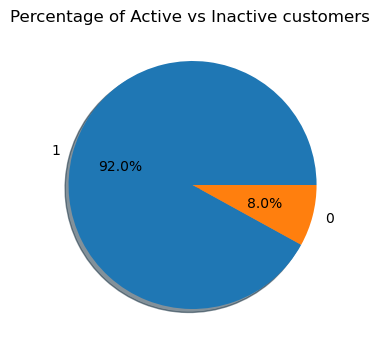

In [215]:
# Create a pie chart to show the percentage for the target column
plt.figure(figsize=(4,5))
values = test_data["Target"].value_counts() /test_data.shape[0]
plt.pie(values,labels=values.keys(),autopct="%1.1f%%",shadow=True)
plt.title("Percentage of Active vs Inactive customers ")
plt.show()

In [559]:
data_df =pd.DataFrame({"ID":test_data["ID"],"Target":test_data["Target"]})

In [560]:
data_df.head()

,ID,Target
0,ID_LZ8K373W7EWV,0
1,ID_04KNWHGV5783,0
2,ID_CXS07G6VLB2U,1
3,ID_N3NFJJVHS25K,0
4,ID_R36J4ROT93E9,1


In [561]:
 # code to save the predicted dataset as a csv file
data_df.to_csv("Submission_file(sasol9).csv",index=False)   # code to save the predicted values as a csv file